# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import requests
import os, re
import glob
import datetime
import time
import sys
from datetime import datetime
from datetime import timedelta
from datetime import date
from dateutil import parser
from os import getenv
import matplotlib.pyplot as plt 
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(24, 9)})
sns.set_style("darkgrid")

In [5]:
da = pd.read_csv('nhanes_2015_2016.csv')

In [6]:
da["DMDMARTL"] = da.DMDMARTL.fillna("Missing")
da["RIAGENDR"] = da.RIAGENDR.fillna("Missing")
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77: "Refused", 99: "Don't Know"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
midage = (da["RIDAGEYR"] > 30) & (da["RIDAGEYR"] <= 40)
female = da['RIAGENDRx'] == 'Female'
male = da['RIAGENDRx'] == 'Male'
da['mid_age'] = np.where(midage, "mid", "notmid")
print(da['RIAGENDRx'].unique())

['Male' 'Female']


In [7]:
da = da[['SEQN','DMDMARTLx', 'RIAGENDRx', 'mid_age', 'agegrp', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210']]

In [10]:
df = da.loc[:, ['SEQN', 'DMDMARTLx', 'RIAGENDRx', 'RIDAGEYR', 'agegrp', 'mid_age']]
print(df['DMDMARTLx'].unique())
df = df.loc[~df.DMDMARTLx.isin(["Missing", "Refused"]), :]  # Eliminate rare/missing values

['Married' 'Divorced' 'Living with partner' 'Separated' 'Never married'
 'Missing' 'Widowed' 'Refused']


In [11]:
print(df['DMDMARTLx'].unique())

['Married' 'Divorced' 'Living with partner' 'Separated' 'Never married'
 'Widowed']


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [0]:
df_female = df[df["RIAGENDRx"] == 'Female']
df_male = df[df["RIAGENDRx"] == 'Male']
df_female_mid = df[(df["RIAGENDRx"] == 'Female') & (df["mid_age"] == 'mid')]
df_male_mid = df[(df["RIAGENDRx"] == 'Male') & (df["mid_age"] == 'mid')]
df_female_mid.head()

,SEQN,DMDMARTLx,RIAGENDRx,RIDAGEYR,agegrp,mid_age
7,83742,Married,Female,32,"(30, 40]",mid
34,83799,Married,Female,37,"(30, 40]",mid
50,83828,Married,Female,39,"(30, 40]",mid
61,83851,Married,Female,37,"(30, 40]",mid
65,83857,Married,Female,31,"(30, 40]",mid


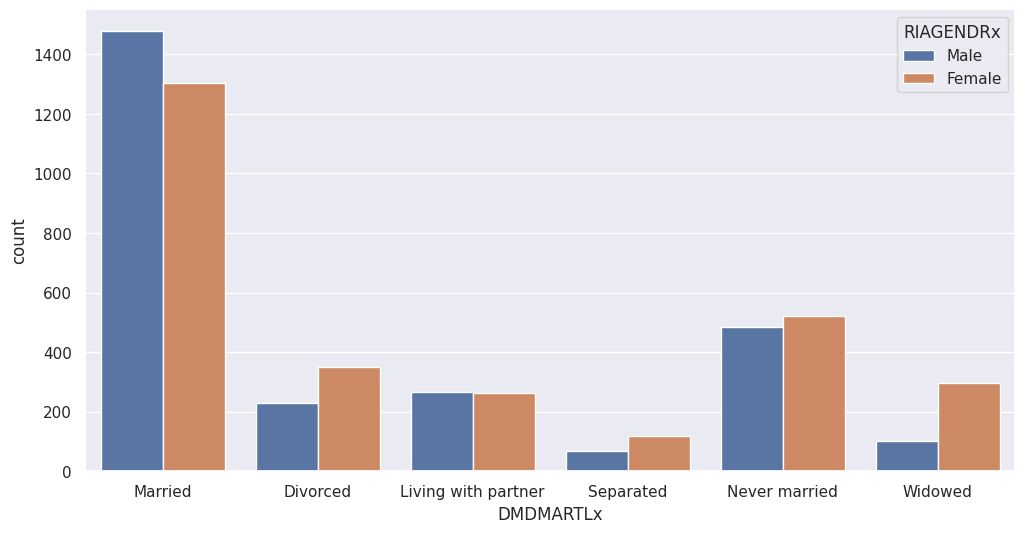

In [0]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="DMDMARTLx", hue="RIAGENDRx")
display()

In [0]:
# insert your code here
# Multi-index: agegroup, gender - male or female, family status -marreid, divorced etc.
x = df[['SEQN','DMDMARTLx', 'RIAGENDRx', 'agegrp']].groupby(['agegrp', 'DMDMARTLx', 'RIAGENDRx'])['agegrp'].count()
# reset_index(name="count")
# y = df[['SEQN','DMDMARTLx', 'RIAGENDRx', 'agegrp']].groupby(['agegrp', 'DMDMARTLx'])['agegrp'].count()
y = df[['SEQN','DMDMARTLx','agegrp']].groupby(['agegrp', 'DMDMARTLx'])['agegrp'].count()
# midage midage or not-midage to make these groups compareable
z = df[['SEQN','DMDMARTLx', 'RIAGENDRx', 'mid_age']].groupby(['mid_age', 'DMDMARTLx', 'RIAGENDRx'])['mid_age'].count()
w = df[['SEQN','DMDMARTLx', 'mid_age']].groupby(['mid_age', 'DMDMARTLx'])['mid_age'].count()
xy = df[['SEQN','DMDMARTLx', 'RIAGENDRx']].groupby(['DMDMARTLx', 'RIAGENDRx'])['RIAGENDRx'].count()

In [0]:
# xy all people - family status - gender
# z includes onl
# z includes mid_age / not_mid_age groups - family status - gender
x.head()

agegrp    DMDMARTLx            RIAGENDRx
(18, 30]  Divorced             Female        11
                               Male           2
          Living with partner  Female       114
                               Male          95
          Married              Female       158
Name: agegrp, dtype: int64

In [0]:
y.head()

agegrp    DMDMARTLx          
(18, 30]  Divorced                13
          Living with partner    209
          Married                262
          Never married          521
          Separated               18
Name: agegrp, dtype: int64

In [0]:
z.head()

mid_age  DMDMARTLx            RIAGENDRx
mid      Divorced             Female        43
                              Male          24
         Living with partner  Female        57
                              Male          72
         Married              Female       258
Name: mid_age, dtype: int64

In [0]:
w.head()

mid_age  DMDMARTLx          
mid      Divorced                67
         Living with partner    129
         Married                516
         Never married          186
         Separated               29
Name: mid_age, dtype: int64

In [0]:
xy.head()

DMDMARTLx            RIAGENDRx
Divorced             Female        350
                     Male          229
Living with partner  Female        262
                     Male          265
Married              Female       1303
Name: RIAGENDRx, dtype: int64

In [0]:
# dx: agegroup - gender - marital status
dx = x.reset_index(name="count")
dy = y.reset_index(name="count")
dz = z.reset_index(name="count")
dw = w.reset_index(name="count")
dxy = xy.reset_index(name="count")

In [0]:
# df1 is a distribution agegroup, gender and family status
df1 = x.groupby(level=[0,1]).apply(lambda g: g / g.sum()*100).reset_index(name ='share-%')
df1 = pd.DataFrame(df1)
df2 = y.groupby(level=[0]).apply(lambda g: g / g.sum()*100).reset_index(name ='share-%')
df2 = pd.DataFrame(df2)
df3 = z.groupby(level=[0,1]).apply(lambda g: g / g.sum()*100).reset_index(name ='share-%')
df3 = pd.DataFrame(df3)
df4 = w.groupby(level=[0]).apply(lambda g: g / g.sum()*100).reset_index(name ='share-%')
df4 = pd.DataFrame(df4)
df5 = xy.groupby(level=[0]).apply(lambda g: g / g.sum()*100).reset_index(name ='share-%')
df5 = pd.DataFrame(df5)
# remove 'Missing' and 'Refused' and "Don't Know"
print(df1.DMDMARTLx.unique())
print(df1.RIAGENDRx.unique())

['Divorced' 'Living with partner' 'Married' 'Never married' 'Separated'
 'Widowed']
['Female' 'Male']

In [0]:
# family status - gender
df5

Out[13]:

,DMDMARTLx,RIAGENDRx,share-%
0,Divorced,Female,60.449050
1,Divorced,Male,39.550950
2,Living with partner,Female,49.715370
3,Living with partner,Male,50.284630
4,Married,Female,46.870504
5,Married,Male,53.129496
6,Never married,Female,51.792829
7,Never married,Male,48.207171
8,Separated,Female,63.440860
9,Separated,Male,36.559140


In [0]:
# mid_age - family status
df4

Out[14]:

,mid_age,DMDMARTLx,share-%
0,mid,Divorced,7.196563
1,mid,Living with partner,13.856069
2,mid,Married,55.424275
3,mid,Never married,19.978518
4,mid,Separated,3.114930
5,mid,Widowed,0.429646
6,notmid,Divorced,11.275050
7,notmid,Living with partner,8.764589
8,notmid,Married,49.856860
9,notmid,Never married,18.013653


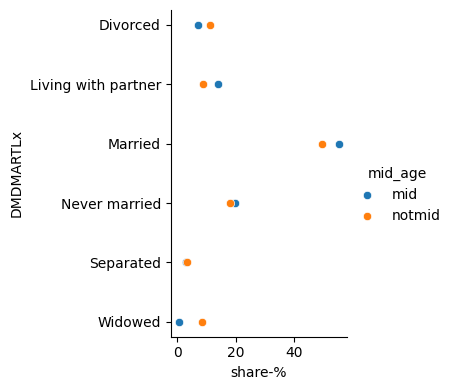

In [0]:
# highlights difference between mid-age and not-mid-age
# g = sns.FacetGrid(df3, col = "mid_age", hue = "RIAGENDRx", height = 6, aspect = 1)
g = sns.FacetGrid(df4, hue = "mid_age", height = 4, aspect = 1)
g = g.map(sns.scatterplot, "share-%", "DMDMARTLx")
g.add_legend()
display()

In [0]:
# mid_age - family status - gender
df3.head()

Out[69]:

,mid_age,DMDMARTLx,RIAGENDRx,share-%
0,mid,Divorced,Female,64.179104
1,mid,Divorced,Male,35.820896
2,mid,Living with partner,Female,44.186047
3,mid,Living with partner,Male,55.813953
4,mid,Married,Female,50.000000


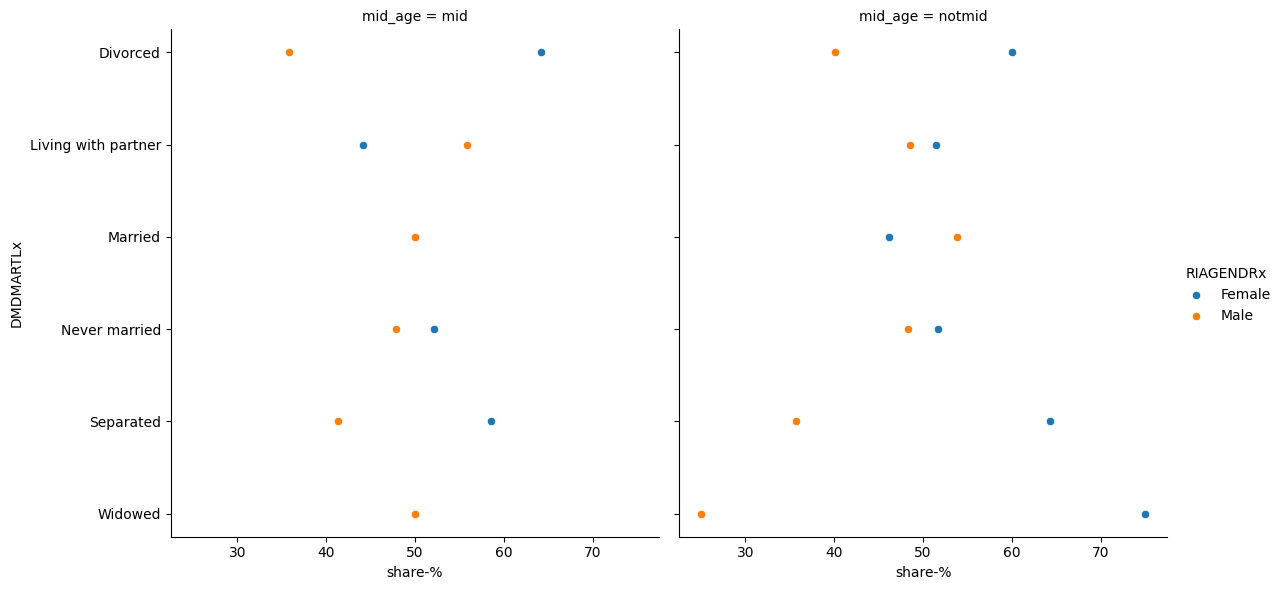

In [0]:
# highlights difference between men and women men + women = 100%
# g = sns.FacetGrid(df3, col = "mid_age", hue = "RIAGENDRx", height = 6, aspect = 1)
g = sns.FacetGrid(df3, col="mid_age", hue = "RIAGENDRx", height = 6, aspect = 1)
g = g.map(sns.scatterplot, "share-%", "DMDMARTLx")
g.add_legend()
display()

In [0]:
# age_group - family status
df2.head(10)

Out[18]:

,agegrp,DMDMARTLx,share-%
0,"(18, 30]",Divorced,1.268293
1,"(18, 30]",Living with partner,20.390244
2,"(18, 30]",Married,25.560976
3,"(18, 30]",Never married,50.829268
4,"(18, 30]",Separated,1.756098
5,"(18, 30]",Widowed,0.195122
6,"(30, 40]",Divorced,7.196563
7,"(30, 40]",Living with partner,13.856069
8,"(30, 40]",Married,55.424275
9,"(30, 40]",Never married,19.978518


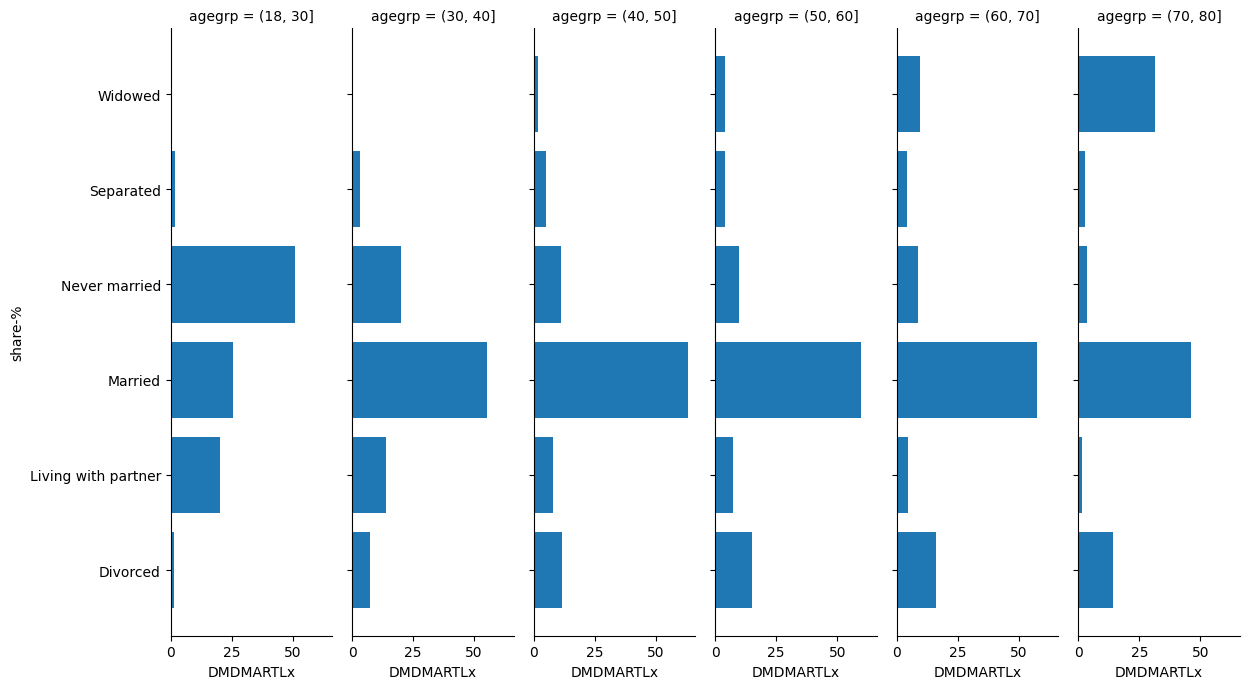

In [0]:
# g = sns.barplot(data=df, x="island", y="body_mass_g", hue="sex")
g = sns.FacetGrid(df2, col = "agegrp", height = 7, aspect = 0.3)
g = g.map(plt.barh, "DMDMARTLx", "share-%", )
display()

In [0]:
# age_group - family status - gender
df1.head(10)

Out[20]:

,agegrp,DMDMARTLx,RIAGENDRx,share-%
0,"(18, 30]",Divorced,Female,84.615385
1,"(18, 30]",Divorced,Male,15.384615
2,"(18, 30]",Living with partner,Female,54.545455
3,"(18, 30]",Living with partner,Male,45.454545
4,"(18, 30]",Married,Female,60.305344
5,"(18, 30]",Married,Male,39.694656
6,"(18, 30]",Never married,Female,49.712092
7,"(18, 30]",Never married,Male,50.287908
8,"(18, 30]",Separated,Female,61.111111
9,"(18, 30]",Separated,Male,38.888889


In [0]:
g = sns.FacetGrid(df1, col = "agegrp", hue = "RIAGENDRx", height = 8, aspect = 0.3)
g = g.map(plt.barh, "DMDMARTLx", "share-%")
g.add_legend()
# display()

Out[21]: <seaborn.axisgrid.FacetGrid at 0x7f59c62467f0>

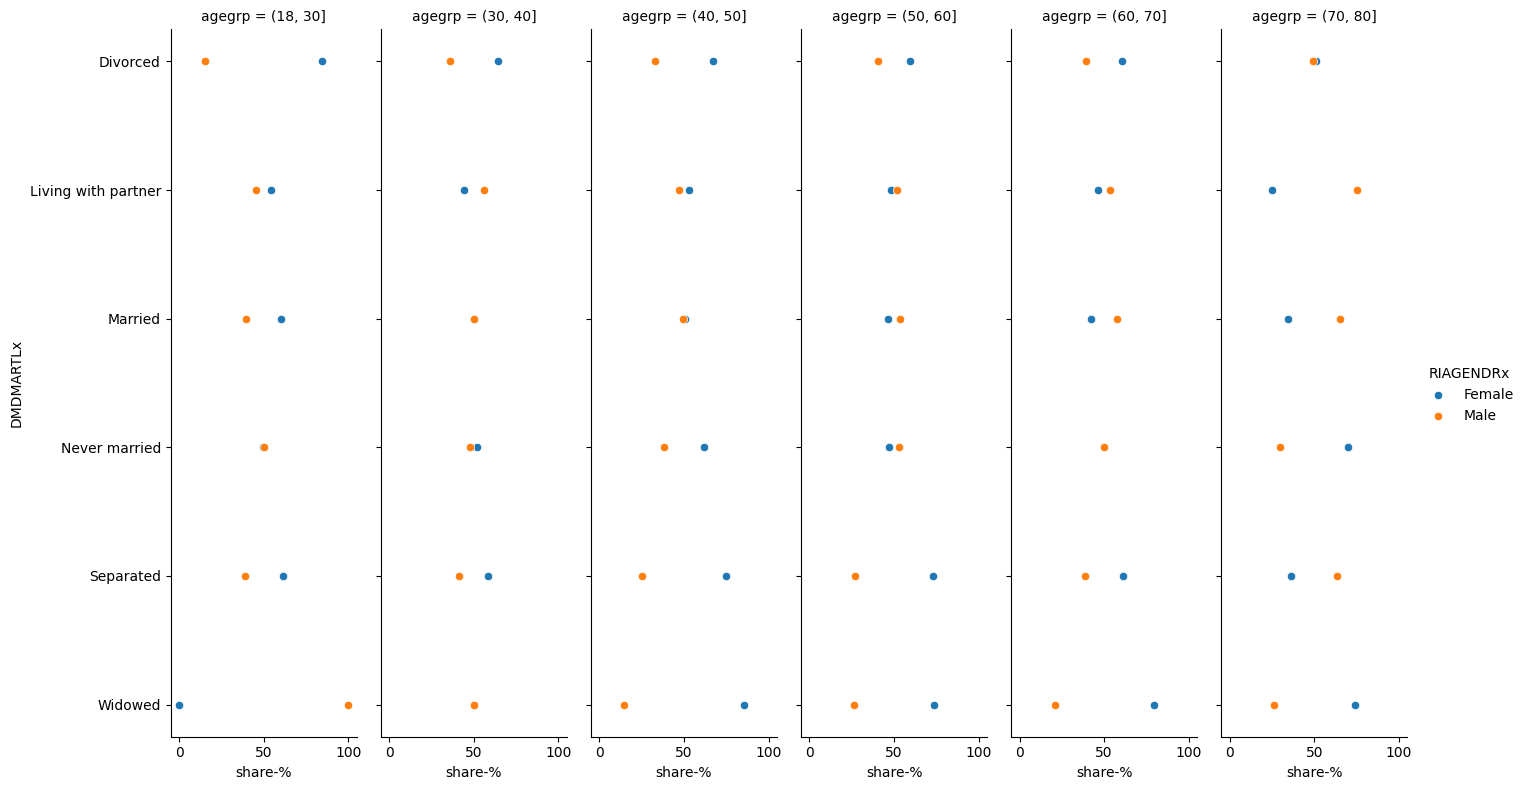

In [0]:
g = sns.FacetGrid(df1, col = "agegrp", hue = "RIAGENDRx", height = 8, aspect = 0.3)
g = g.map(sns.scatterplot, "share-%", "DMDMARTLx")
g.add_legend()
display()

In [0]:
g = sns.FacetGrid(df1, row = "agegrp", col = "RIAGENDRx", height = 4, aspect = 2)
g = g.map(plt.barh, "DMDMARTLx", "share-%")
g.add_legend()
# display()

Out[23]: <seaborn.axisgrid.FacetGrid at 0x7f59cf2e1a90>

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [0]:
# family status - gender
df5.head()

Out[30]:

,DMDMARTLx,RIAGENDRx,share-%
0,Divorced,Female,60.449050
1,Divorced,Male,39.550950
2,Living with partner,Female,49.715370
3,Living with partner,Male,50.284630
4,Married,Female,46.870504


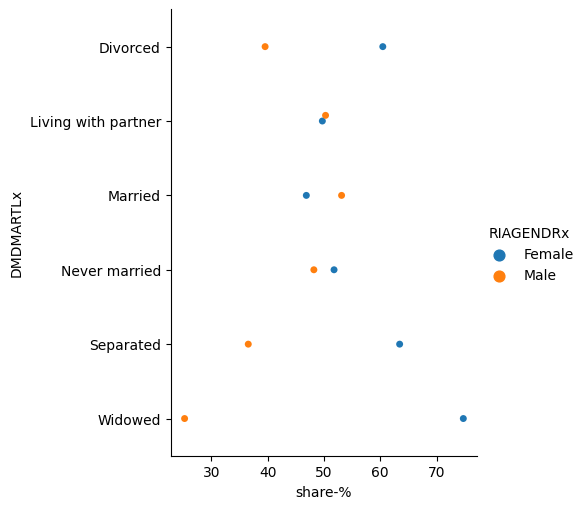

In [0]:
sns.catplot(data=df5, x="share-%", y="DMDMARTLx", hue="RIAGENDRx", kind="swarm")
display()

In [0]:
g = sns.FacetGrid(df5, hue = "RIAGENDRx", height = 5, aspect = 1)
g = g.map(sns.scatterplot, "share-%", "DMDMARTLx")
g.add_legend()
# display()

Out[31]: <seaborn.axisgrid.FacetGrid at 0x7f59d03f4a30>

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [0]:
df.head()

Out[68]:

,SEQN,DMDMARTLx,RIAGENDRx,RIDAGEYR,agegrp,mid_age
0,83732,Married,Male,62,"(60, 70]",notmid
1,83733,Divorced,Male,53,"(50, 60]",notmid
2,83734,Married,Male,78,"(70, 80]",notmid
3,83735,Living with partner,Female,56,"(50, 60]",notmid
4,83736,Divorced,Female,42,"(40, 50]",notmid


In [0]:
df.query("mid_age == 'mid'").head()

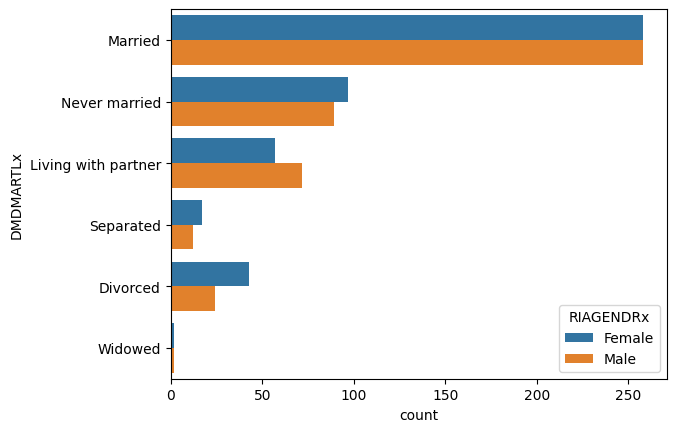

In [0]:
sns.countplot(data=df.query("mid_age == 'mid'"), y="DMDMARTLx", hue = "RIAGENDRx")
display()

__Q1c.__ Repeat part b for the men.

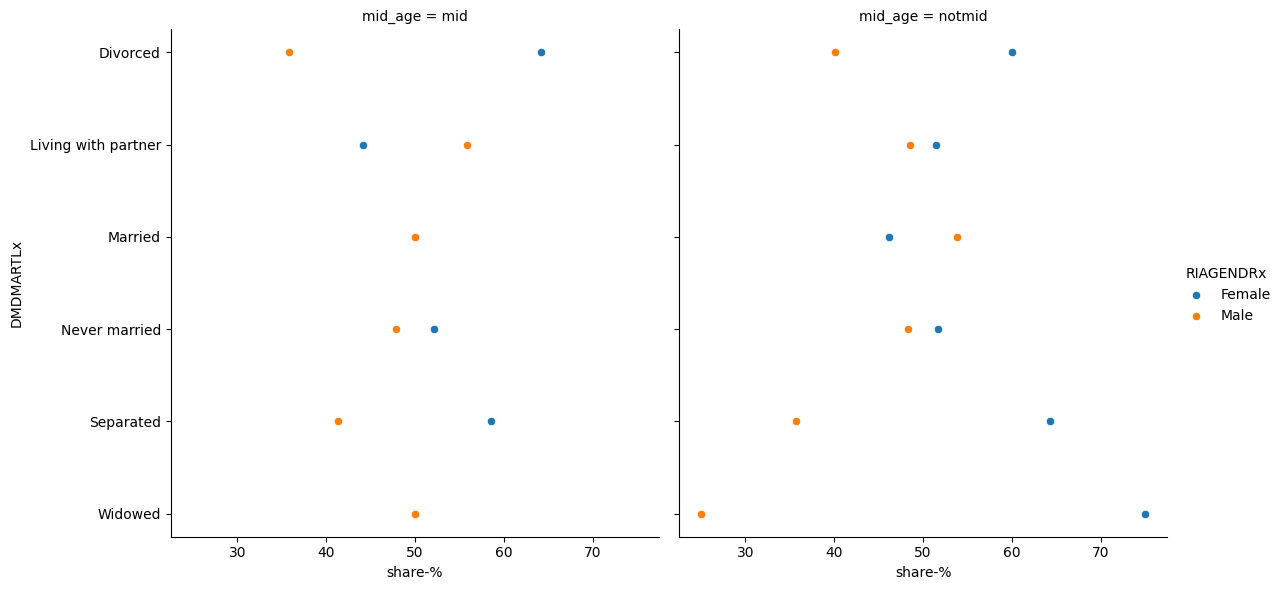

In [0]:
g = sns.FacetGrid(df3, col="mid_age", hue = "RIAGENDRx", height = 6, aspect = 1)
g = g.map(sns.scatterplot, "share-%", "DMDMARTLx")
g.add_legend()
display()

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.